# Notas do curso Séries Temporais com Python

## Capítulo 4: Previsão de Séries Temporais

### 1. Considerações gerais

#### Erros

Mesmo com métodos comprovadamente úteis advindos do aprendizado de máquina e do uso de redes neurais, previsões sempre estão sujeitas a erros pois nem todas as variáveis são conhecidas e aquelas que são, nem sempre são precisas. Por exemplo, em uma previsão de preços de combustível é praticamente impossível predizer o surgimento de futuras crises. E mesmo que seja possível predizer economicamente a próxima crise, nem sempre é matematicamente viável predizer o impacto com precisão.

Portanto todas as previsões estão sempre erradas, o problema se torna então diminuir estes erros.

#### Métodos de previsão de séries temporais

Basicamente temos 3 métodos:

- Usar os próprios dados (Séries temporais puras): neste caso tomamos a série histórica e a partir do comportamento dos dados ao longo do tempo pregresso extrapolamos para o tempo futuro.

- Usar variáveis externas (Modelo explanatório): aqui lançamos mão de outras variáveis relacionadas ao fenômeno presente na série temporal. Por exemplo, para predizer a temperatura amanhã podemos procurar dados sobre a umidade do ar, pluviosidade e etc.

- Usando as duas técnicas anteriores (Modelo misto).

A previsão se dá pela busca de um padrão repetido ao longo dos intervalos de tempo. Se a série temporal não apresentar um padrão mas antes for fortemente aleatória dificilmente teremos como extrapolar com precisão tal comportamento e, por isso, será inútil o resultado.

Por se tratar de uma extrapolação, quanto mais longe é o tempo para o qual quer se calcular a previsão em relação aos dados armazenados, menor será a previsibilidade. Um dos métodos que estudaremos tenta considerar este efeito ao atribuir pesos sobre a influência que os dados tem em relação a previsão dada a distância temporal entre os dados e a data para o qual se quer calcular a previsão: quanto maior a distância temporal menor é o peso. Por conta da variação desses pesos (entre outros fatores discutidos mais à frente) temos não apenas um **ponto de previsão** mas um intervalo de **previsão**. A este conjunto, ponto e intervalo, chamamos de **distribuição da previsão**.

#### Um bom modelo de previsão

Para obter bons modelos de previsão é necessário atentar para alguns fatores principais:

- Avaliar residuais: qual é a diferença entre o valor previsto pelo modelo e o valor real? Para isso podemos separar um parte da amostra (com resultados conhecidos) para estabelecer essa comparação.

- Avaliar performance: MAE, RMSE e outras medidas do erro do modelo em relação à série.

- Avaliar métricas: AIC, BIC, etc.

#### Dicas gerais
- Residuais em conformidade não indicam por si só um bom modelo
- Um primeiro modelo bom provavelmente pode ser melhorado
- Nem sempre usar todos os dados (variáveis) disponíveis fornecerá o melhor resultado

### 2. Suavização exponencial

#### Princípios básicos
- As observações do passado possuem pesos
- Quanto mais recentes as observações maiores serão seus pesos para as previsões
- Parâmetro $\alpha$: valor entre 0 e 1 que determina o peso das observações

#### Suavização exponencial simples
Toma o último valor na extrapolação: muito simples, porém pode seraltamente impreciso.

#### Tendência linear de Hold
Aplicável apenas em dados com tendência. Toma a tendência linear a partir dos dados e extrapola simplesmente usando uma reta.

#### Tendência amortecida (damped)
Evita o crescimento (ou decrescimento) infinito da tendência linear de Hold admitindo um paâmetro de amortecimento $0\leq\phi\leq1$ (na forma de uma exponencial $-\exp\left(\phi\cdot\rm{data}\right)$

#### Holt-Winters Sazonal
Inclui captura da sazonalidade e é aplicável se houver tendência. Dois métodos são possíveis neste caso: aditivo (para sazonalidade constante) e multiplicativo (variação sazonal ao longo da série).

#### Método ETS (erro, tendência, sazonalidade)
Neste modelo informamos como cada componente é considerado na série temporal: aditivo, multiplicativo, nenhum ou automático.

### 3. Método ARIMA não-sazonal

ARIMA é a sigla (em inglês) para média móvel integrada autoregressiva. É um método de previsão de séries temporais aplicável em séries estáveis (com poucos outliers) e estacionárias, portanto métodos de transformação podem ser necessários.

Este método é autoregressivo pois ele avalia a autocorrelação entre períodos.

Também é chamado integrado pois aplica a diferenciação, se necessário.

Por fim também aplica média móvel para avaliar erros entre períodos.

Para controlar estas 3 partes definimos 3 parâmetros: $p$ é a ordem da parte autoregressiva, $d$ é o grau de diferenciação (0, 1 ou 2) e $q$ é a ordem da média móvel. O valor do parâmetro $p$ será = 1 se determinada observação do fenômeno puder ser explicada pela observação prévia + erro e será = 2 se determinada observação puder ser explicada por duas observações prévias + erro. O parâmetro $q$ é = 1 quando apenas o erro da observação prévia for suficiente para explicar a observação atual e = 2 caso sejam necessários os erros de duas observações prévias para explicar a observação atual.

#### Como definir valores dos parâmetros?

$p$: PACF

$d$: Teste de estacionariedade

$q$: ACF

#### Como saber melhor modelo?

Akaike Information Criteria (AIC e AICc)
Bayesian Information Criteria (BIC)

#### ARIMA sazonal

Inclui também os parâmetros $P$, $D$ e $Q$ tornando o modelo mais complexo.

## Parte Prática

### 4. Média Móvel em valor de ações

In [2]:
# Importando biblioteca para leitura de dados em csv
import pandas as pd

# Importando biblioteca otimizada para cálculos vetoriais
import numpy as np

# Importando biblioteca de gráficos
from matplotlib import pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


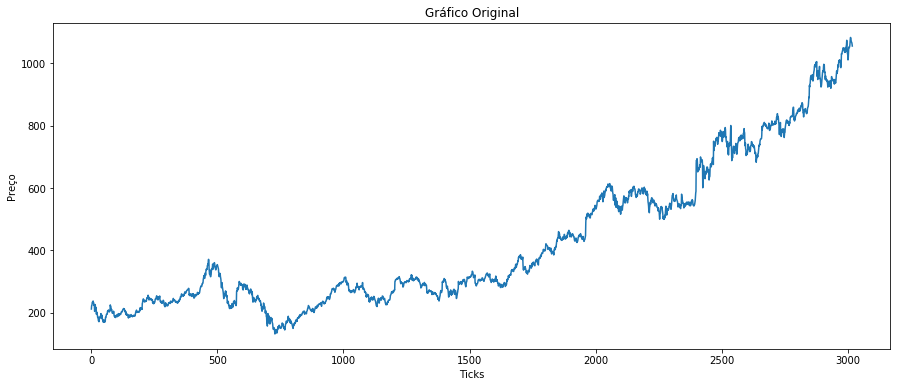

In [13]:
# Importando dados
stocks = pd.read_csv("../Material/Dados/all-stocks-2006-01-01-to-2018-01-01.csv",
                     index_col = 'Date', parse_dates = ['Date'])

# Filtrando ações do google
g_stck = stocks.query('Name == "GOOGL"')

# Criando uma nova variável: ID da ação
g_stck['Ticks'] = range(len(g_stck.index.values))

# Gráfico dos preços das ações na abertura
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Preço')
ax1.set_title('Gráfico Original')
ax1.plot('Ticks', 'Open', data = g_stck)

In [20]:
# Média móvel
g_stck['mov_avg'] = g_stck['Open'].rolling(window = 80).mean()
g_stck.head()

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Open,High,Low,Close,Volume,Name,Ticks,mov_avg
Date,,,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL,0,NaN
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL,1,NaN
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL,2,NaN
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL,3,NaN
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL,4,NaN


In [21]:
# Subset dos dados
g_stck_fltr = g_stck[(g_stck['Ticks'] >= 900) & (g_stck['Ticks'] <= 1100)]
g_stck_fltr.head()

,Open,High,Low,Close,Volume,Name,Ticks,mov_avg
Date,,,,,,,,
2009-07-31,225.21,226.58,221.44,221.75,2861550,GOOGL,900,205.07250
2009-08-03,224.59,227.18,224.04,226.33,2591173,GOOGL,901,205.60575
2009-08-04,224.91,227.23,224.44,227.09,2390098,GOOGL,902,206.10550
2009-08-05,228.23,228.68,224.16,225.80,2342227,GOOGL,903,206.63525
2009-08-06,227.38,227.67,224.49,225.41,2111395,GOOGL,904,207.11925


Text(0.5, 1.0, 'Média Móvel')

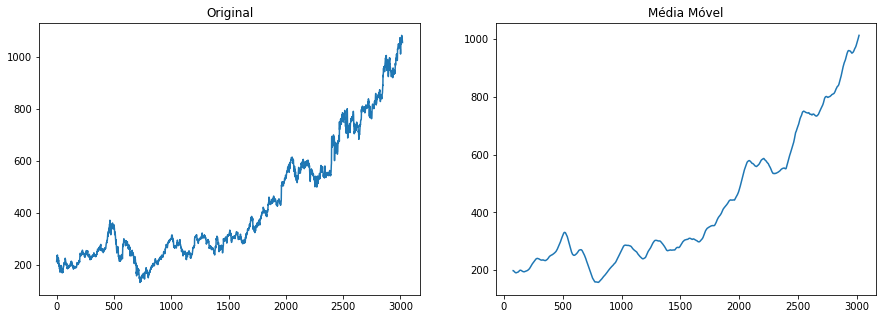

In [23]:
# Gráfico da média móvel e dos dados originais
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
axes[0].plot('Ticks', 'Open', data = g_stck)
axes[0].set_title('Original')

axes[1].plot('Ticks', 'mov_avg', data = g_stck)
axes[1].set_title('Média Móvel')

### 5. Suavização exponencial simples

In [24]:
# Importando dataset (com a correta leitura da data)
dataparse = lambda dates_vector: pd.datetime.strptime(dates_vector, "%Y-%m")
ts = pd.read_csv("../Material/Dados/AirPassengers.csv",
                 parse_dates = ["Month"], index_col = "Month", date_parser = dataparse)

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [27]:
# Importando bibliotecas de suavização
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

C:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


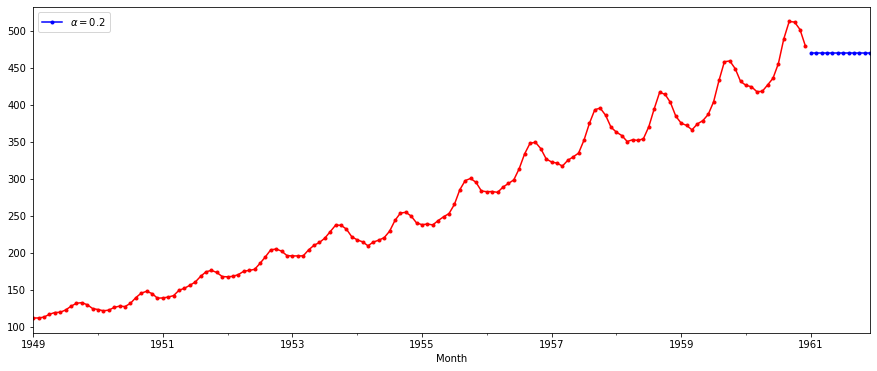

In [32]:
# Treinando modelo de suavização
simple_exp_smooth = SimpleExpSmoothing(ts).fit(smoothing_level = 0.2, optimized = False)

# Prevendo 12 meses com o modelo treinado
fcast_ses = simple_exp_smooth.forecast(12).rename(r'$\alpha = 0.2$')

# Gráfico da previsão
fcast_ses.plot(marker = '.', color = 'blue', legend = True) # dados previstos
simple_exp_smooth.fittedvalues.plot(marker = '.', color = 'red') # dados originais

Note que a previsão não captura nem a tendência tampouco a sazonalidade da série temporal. Podemos permitir uma otimização automática e verificar se os resultados são melhores

C:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


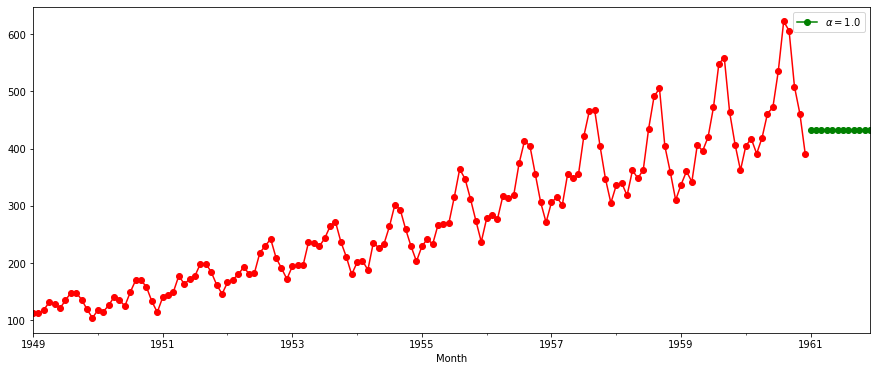

In [37]:
# Treinando modelo de suavização
auto_ses = SimpleExpSmoothing(ts).fit()

# Prevendo 12 meses com o modelo treinado
fcast_auto_ses = auto_ses.forecast(12).rename(r'$\alpha = %s$'%auto_ses.model.params['smoothing_level'])

# Gráfico da previsão
fcast_auto_ses.plot(marker = 'o', color = 'green', legend = True) # dados previstos
auto_ses.fittedvalues.plot(marker = 'o', color = 'red') # dados originais

### 6. Suavização de Holt

C:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


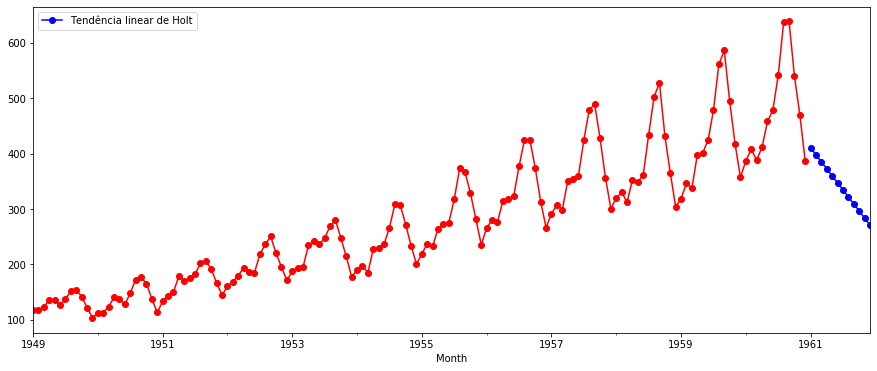

In [43]:
# Treinamento do modelo de suavização
holt = Holt(ts).fit(smoothing_level = 0.8, smoothing_slope = 0.2, optimized = False)

# Prevendo dados das próximas 12 observações
fcast_holt = holt.forecast(12).rename("Tendência linear de Holt")

# Gráfico da previsão
fcast_holt.plot(marker = 'o', color = 'blue', legend = True) # dados previstos
holt.fittedvalues.plot(marker = 'o', color = 'red') # dados originais

C:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


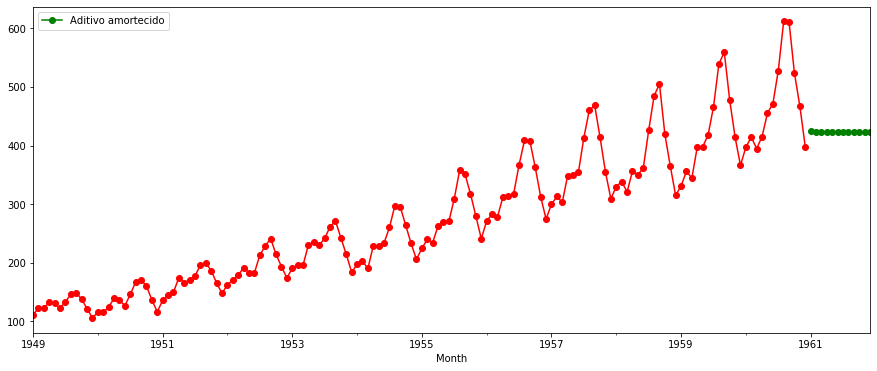

In [47]:
# Treinamento do modelo de suavização: novos parâmetros
holt_no_opt = Holt(ts, damped = True).fit(smoothing_level = 0.8, smoothing_slope = 0.2)

# Prevendo dados das próximas 12 observações
fcast_holt_no_opt = holt_no_opt.forecast(12).rename("Aditivo amortecido")

# Gráfico da previsão
fcast_holt_no_opt.plot(marker = 'o', color = 'green', legend = True) # dados previstos
holt_no_opt.fittedvalues.plot(marker = 'o', color = 'red') # dados originais

### 7. Holt Winters (capaz de capturar tendência e sazonalidade)

C:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


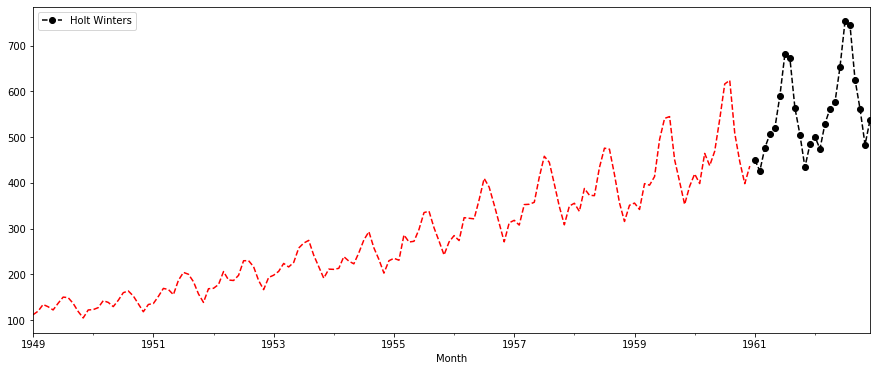

In [52]:
# Treinamento do modelo (ciclo de 12 meses ou 1 ano, método aditivo para trend e sazonalidade)
hw = ExponentialSmoothing(ts, seasonal_periods = 12, trend = 'additive', seasonal = 'additive').fit(use_boxcox = True)
# boxcox = True para usar transformação caso a série não seja estacionária)

# Prevendo dados das próximas 12 observações
fcast_hw = hw.forecast(24).rename("Holt Winters")

# Gráfico da previsão
fcast_hw.plot(style = '--', marker = 'o', color = 'black', legend = True) # dados previstos
hw.fittedvalues.plot(style = '--', color = 'red') # dados originais

### 8. ARIMA

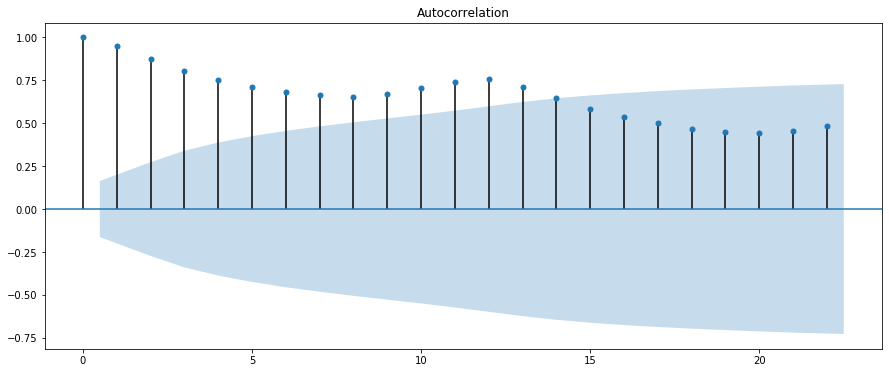

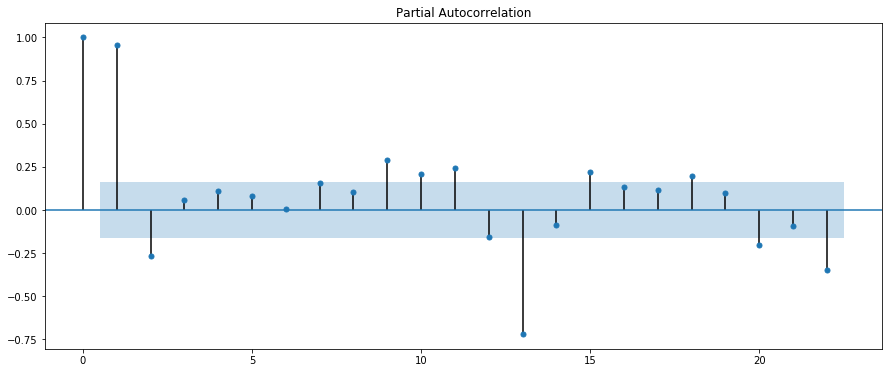

In [55]:
# Antes de treinar o modelo precisamos escolher os parâmetros p, d e q ------------------------------------------

# Utilizando o gráfico PACF e ACF definimos os parâmetros p e q
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ts)
plt.show()
plot_pacf(ts)
plt.show()

Aqui é interessante ler a explicação detalhada em https://people.duke.edu/~rnau/411arim3.htm e https://otexts.com/fpp2/arima-r.html.

<inserir explicação própria>

<inserir escolhas de parâmetros>

In [56]:
# Importação da biblioteca ARIMA
from statsmodels.tsa.arima_model import ARIMA

# Criação do modelo
mod510 = ARIMA(ts, order = (5,1,0))

# Treinando modelo
fit510 = mod510.fit(disp = 0)
print(fit510.summary())

C:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -688.248
Method:                       css-mle   S.D. of innovations             29.720
Date:                Thu, 24 Sep 2020   AIC                           1390.495
Time:                        15:29:12   BIC                           1411.235
Sample:                    02-01-1949   HQIC                          1398.923
                         - 12-01-1960                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.6402      2.016      1.310      0.190      -1.311       6.592
ar.L1.D.#Passengers     0.3120      0.084      3.715      0.000       0.147       0.477
ar.L2.D.#Passeng

In [68]:
# Modelo com ordens diferentes
mod214 = ARIMA(ts, order = (2,1,4))

# Treinando modelo
fit214 = mod214.fit(disp = 0)
print(fit214.summary())

C:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 4)   Log Likelihood                -661.292
Method:                       css-mle   S.D. of innovations             23.715
Date:                Thu, 24 Sep 2020   AIC                           1338.585
Time:                        15:45:04   BIC                           1362.288
Sample:                    02-01-1949   HQIC                          1348.216
                         - 12-01-1960                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.6854      0.134     19.980      0.000       2.422       2.949
ar.L1.D.#Passengers     0.9143      0.082     11.140      0.000       0.753       1.075
ar.L2.D.#Passeng

Note que o resultado com parâmetros 2, 1, 4 são melhores que para 5, 1 ,0. 

#### Resíduos

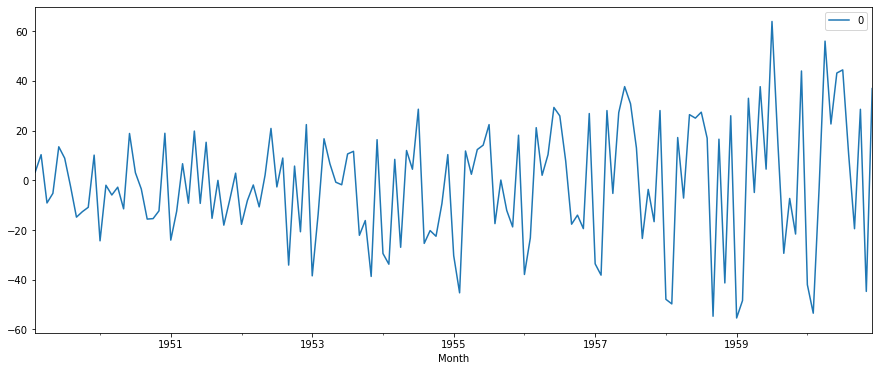

In [70]:
resid = pd.DataFrame(fit214.resid)
resid.plot(); plt.show()

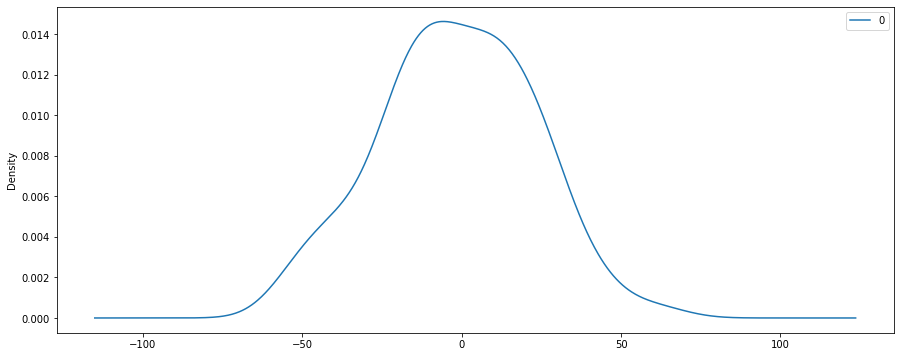

                0
count  143.000000
mean    -1.695823
std     24.195694
min    -55.387767
25%    -17.681826
50%     -1.979535
75%     15.836787
max     63.928562


In [72]:
# Densidade dos resíduos
resid.plot(kind = 'kde'); plt.show()
print(resid.describe())

Previsto = 363.596727, esperado = 340.000000
Previsto = 353.342555, esperado = 318.000000
Previsto = 327.329796, esperado = 362.000000
Previsto = 386.292255, esperado = 348.000000
Previsto = 351.868253, esperado = 363.000000
Previsto = 374.431202, esperado = 435.000000
Previsto = 446.153740, esperado = 491.000000
Previsto = 478.476607, esperado = 505.000000
Previsto = 471.329400, esperado = 404.000000
Previsto = 348.408688, esperado = 359.000000
Previsto = 351.960531, esperado = 310.000000
Previsto = 320.245749, esperado = 337.000000
Previsto = 376.053370, esperado = 360.000000
Previsto = 387.684942, esperado = 342.000000
Previsto = 356.134077, esperado = 406.000000
Previsto = 435.401035, esperado = 396.000000
Previsto = 395.110081, esperado = 420.000000
Previsto = 425.843207, esperado = 472.000000
Previsto = 472.006503, esperado = 548.000000
Previsto = 535.629793, esperado = 559.000000
Previsto = 515.321126, esperado = 463.000000
Previsto = 399.715151, esperado = 407.000000
Previsto =

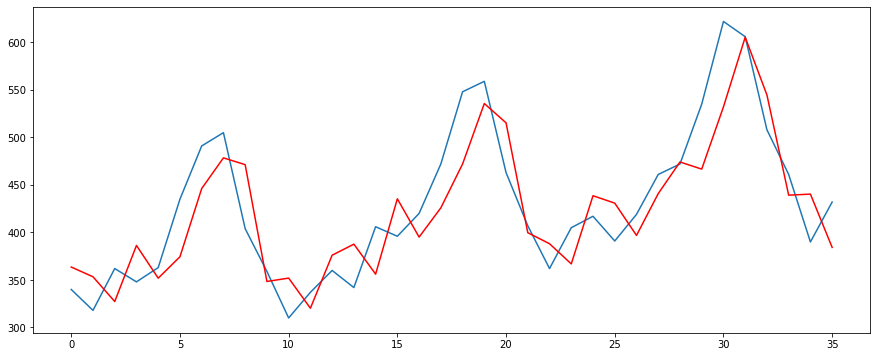

In [78]:
# Previsão usando o modelo --------------------------------------------------------------------------------------

# Usando dados originais para...
X = ts.values

# treino (75%)
size = int(len(X) * 0.75)

# e teste
train, test = X[0:size], X[size:len(X)]

# Série temporal de treino
history = [x for x in train]

# Previsões
pred = []

# Treinando ...
for t in range(len(test)):
    # Criando modelo
    model = ARIMA(history, order = (2,1,1))
    # treinando
    fit = model.fit(disp = 0)
    # prevendo
    out = fit.forecast()
    # salvando resultado
    y = out[0]
    pred.append(y)
    obs = test[t]
    history.append(obs)
    # imprimindo resultado
    print('Previsto = %f, esperado = %f' % (y, obs))
    
plt.plot(test)
plt.plot(pred, color = 'red')
plt.show()